# Modelling the spread of a virus 

Around 1927, Kermack and McKendrick introduced a set of coupled ordinary first-order differential equations to model the spread of infectuous diseases. It only considers a population of N persons in three states. One is either S = Susceptible, I=infectious, or R = Recovered (i.e. immune, or deceased). The recovery rate is $\gamma$ and the contact rate is $\beta$:  
$$ 
    \frac {dS}{dt}=-\frac {\beta SI}{N} \\
    \frac {dI}{dt}=\frac {\beta SI}{N}-\gamma I \\
    \frac {dR}{dt}=\gamma I
$$
These three equations state from bottom to top: 

1. The rate of change in the number of recovered people $R$ is equal to the recovery rate $\gamma$ times the number of infected people $I$.
2. The rate of change in the numer of infected people $I$ is the difference between the number of people getting infected and the number of people who recover
3. The rate of change in the number of susceptible people $S$ is proportional to the number of susceptible people available times the infection rate


In python, this SIR model is easy to code, and doing so provides insights about the spreading of infectuous diseases in a population.

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Defining constants:

In [6]:
tspan = 160 # time span to follow the evolution of the population. The units are arbitrary, but let's call them "days.
N=100 # total population
beta =0.2 # mean contact rate per unit time (day): how contagious the disease is.
gamma =0.2 # mean recovery rate per unit time (day)
I0=1 # infected people at the start

A function that sets up all the right-hand sides of the ODEs in a vector $v$:

In [7]:
def rhs(t, v): 
    return [-beta*v[0]*v[1]/N, beta*v[0]*v[1]/N-gamma*v[1], gamma*v[1]]

This is where the magic happens: a python function solve_ivp to solve this [initial value problem](https://en.wikipedia.org/wiki/Initial_value_problem). You can read the docs of this function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

In [8]:
res = solve_ivp(rhs, (0, tspan), [N-I0, I0, 0],t_eval=np.linspace(0,tspan,100))

Let's plot the three groups in the population, S,I, and R:

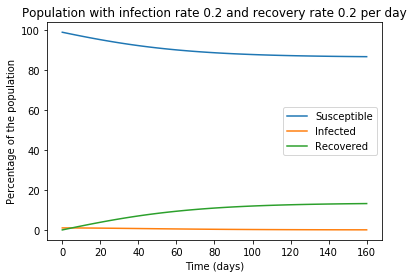

In [9]:
plt.figure()
plt.plot(res.t, res.y.T)
plt.xlabel('Time (days)')
plt.ylabel('Percentage of the population')
plt.legend(['Susceptible','Infected','Recovered'])
plt.title(f'Population with infection rate {beta} and recovery rate {gamma} per day')
plt.show()

You can see that early on, the number of infected grows exponentially.

#### Herd Immunity and the basic reproduction number
The moment when $\beta/\gamma <N/S$, then the number of infected will not grow, because then $dI/dt <0$. This means when the number of persons who are susceptible in the population drops below a certain number, there is "herd immunity." In this example, herd immunity is reached when $S = N \gamma/\beta = 100*0.1/0.2 = 50$. In the original example above $\beta = 0.2$ and $\gamma =0.1$ at $t= 44$ days the number of infected $I$ starts to drop. 

Different modeling scenarios are often coined in terms of the Basic Reproduction number $R_0= \beta/\gamma$. This is the average number of times an infected person spreads the virus before recovering.

#### Buying time by flattening the curve
If you can reduce the recovery time ($1/\gamma$), and/or lower the infection rate $\beta$, then the infection curve changes: The smaller $R_0$, the flatter the infections curve. Once $R_0<1$, the virus can be stopped all-together.

In our example, the recovered population $R(t)$ is the sum of those who became immune, and those that perished. If a virus is lethal in 2\% of the cases, $0.02*N$ will perish, unless a cure/vaccine is developed. Measures to slow down the spread (decrease $\beta$) are important to allow as possible to develop a vaccine.  

#### More advanced models
More advanced models separate the suspectible and exposed people (SEIR), or consider a virus where immunity is only temporary, or can be passed on at birth, etc. Examples of these can be found [here](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)